In [41]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [42]:
D = 0.01
a = 0.2
b = 0.3
epsilon = 0.03

In [43]:
T = 10
N_x = 50
N_t = 1000

In [44]:
dx = 1.0/N_x
dt = T/N_t

In [45]:
u = np.zeros((N_x+1,N_t+1))
w = np.zeros((N_x+1,N_t+1))

In [46]:
x = np.linspace(0,1,Nx+1)
u[:,0] = 0.1+0.1*np.sin(4*np.pi*x)
u[:,-1] = 0.2
w[:,0] = 0

In [47]:
for n in range(Nt):
    for i in range(1,N_x):
        du = (u[i+1,n] - u[i,n])/dx
        d2u = (u[i+1,n] - 2*u[i,n] + u[i-1,n])/dx**2
        dw = (w[i+1,n]-w[i-1,n])/(2*dx)
        u[i,n+1] = u[i,n] + dt*(D*d2u-u[i,n]*(u[i,n]-a)*(1-u[i,n])+w[i,n])
        w[i,n+1] = w[i,n] + dt*epsilon*(u[i,n]-b*w[i,n]-dw)

<IPython.core.display.Javascript object>


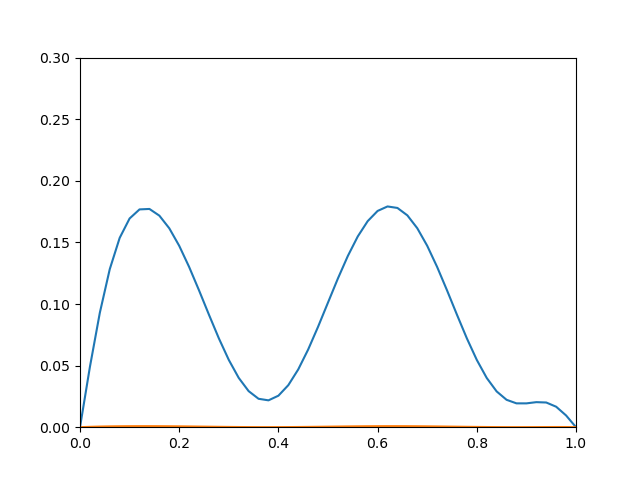

In [49]:
fig,ax = plt.subplots()
l_u, = ax.plot([],[])
l_w, = ax.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(0,0.3)

def init():
    line_u.set_data([],[])
    line_w.set_data([],[])
    
    return l_u,l_w

def update(i):
    x = np.linspace(0,1,Nx+1)
    l_u.set_data(x,u[:,i])
    l_w.set_data(x,w[:,i])
    
    return l_u,l_w

Animation = animation.FuncAnimation(fig,update,frames=range(Nt+1),init_func=init)

In [ ]:
# No alcanzamos a analizar bien el punto f, tenganos paciencia profe, somos geocientíficos :C